**Importing required Python Libraries**

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

**Reading “Heart Disease UCI” Data**

In [173]:
DF = pd.read_csv("../input/heart.csv")
DF_Shape = {"Total Rows": [len(DF.index)], "Total Columns": [len(DF.columns)]}
DF_Shape = pd.DataFrame(DF_Shape,index=["Values"])
DF_Shape.transpose()

,Values
Total Rows,303
Total Columns,14


**Evaluating Data Texture and Spread**

In [174]:
index = list(DF.columns)
new_df = pd.DataFrame(index=index)
for col in DF.columns:
    new_df.at[col,'data_type'] = DF[col].dtypes
    new_df.at[col,'null_count'] = DF[col].isnull().sum()
    new_df.at[col,'unique_value'] = DF[col].nunique()
    new_df.at[col,'min_value'] = DF[col].min()
    new_df.at[col,'mean_value'] = round(DF[col].mean(),0)
    new_df.at[col,'max_value'] = DF[col].max()
new_df

,data_type,null_count,unique_value,min_value,mean_value,max_value
age,int64,0.0,41.0,29.0,54.0,77.0
sex,int64,0.0,2.0,0.0,1.0,1.0
cp,int64,0.0,4.0,0.0,1.0,3.0
trestbps,int64,0.0,49.0,94.0,132.0,200.0
chol,int64,0.0,152.0,126.0,246.0,564.0
fbs,int64,0.0,2.0,0.0,0.0,1.0
restecg,int64,0.0,3.0,0.0,1.0,2.0
thalach,int64,0.0,91.0,71.0,150.0,202.0
exang,int64,0.0,2.0,0.0,0.0,1.0
oldpeak,float64,0.0,40.0,0.0,1.0,6.2


**Graphical representation of 1 (True or Yes) and 0 (False or No) in Target column**

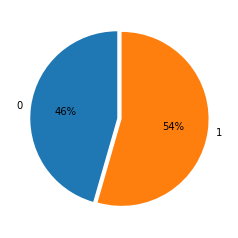

In [175]:
DF['Count'] = 1
target = pd.pivot_table(DF, values='Count', index=['target'], aggfunc = np.sum).fillna(0).reset_index()
DF.drop(['Count'], axis=1, inplace=True)
plt.pie(target['Count'], labels=target['target'], autopct='%1.0F%%', startangle=90, explode=(0.025,0.025))
plt.show()

**Weighted Model for Prediction**

In [176]:
df,Y,T,F = DF,'target',1,0
DF4 = pd.DataFrame()
for col in df.columns:
    if col != Y:
        X = str(col)
        data = df[[Y,X]]
        Z = X + '_grp'
        data[Z] = data[X]
        data['Count'] = 1
        table = pd.pivot_table(data, values='Count', index=[Z], columns=[Y], aggfunc=np.sum).fillna(0).reset_index()
        table['True%'] = (table[T] / (table[T] + table[F]))
        table['False%'] = (table[F] / (table[T] + table[F]))
        A = Z + '_Weightage'
        table[A] = round((table['True%']) - (table['False%']),2)
        table2 = table.set_index(Z)
        table2 = table2[[A]]
        data2 = data[Z]
        DF2 = DF.join(data2)
        DF3 = pd.merge(DF2, table2, left_on=Z, right_index=True)
        DF4[A] = DF3[A]
DF4['Total_Weightage'] = 0
DF4['Total_Weightage'] = DF4.sum(axis = 1, skipna = True)
A_DF = DF.iloc[:,-1]
DF5 = DF4.join(A_DF)

**Setting up a Benchmark for Prediction**

In [177]:
BenMar = DF5['Total_Weightage'].quantile(0.46)
round(BenMar,2)

1.04

**Predicting the Output and checking the Accuracy Score**

In [178]:
for ix in DF5.index:
    if DF5.at[ix,'Total_Weightage'] <= BenMar:
        DF5.at[ix,'Pred'] = F
    else:
        DF5.at[ix,'Pred'] = T
round(accuracy_score(DF5['target'],DF5['Pred']),2)

0.94

**Applying Logistic Regression to compare Accuracy Score**

In [179]:
x = DF.iloc[:,0:13]
y = DF.iloc[:,len(DF.columns)-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
round(accuracy_score(y_pred,y_test),2)

0.8

**Clearly the Weighted Model has better Accuracy Score**